In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
from sklearn import tree
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import missingno as msno
import pandas as pd
import numpy as np
import scipy.interpolate as ip
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('정규화.csv')
test_df = pd.read_csv('정규화하기전.csv')
test_df['일시'] = pd.to_datetime(test_df['일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')
test_df.drop(columns=['ulsan','dangjin_floating','dangjin_warehouse','dangjin'],inplace=True)

In [4]:
df

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),...,지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),ulsan,dangjin_floating,dangjin_warehouse,dangjin,일시
0,0.257634,0.0,0.094017,0.194444,0.586579,0.076487,0.312500,0.758095,0.766478,0.0,...,0.114493,0.113475,0.123393,0.104225,NaN,0.0,5.075459e-07,0.000005,0.0,2018-01-01 00:00
1,0.230916,0.0,0.085470,0.250000,0.674566,0.076487,0.316532,0.756190,0.764595,0.0,...,0.111594,0.111111,0.120823,0.101408,0.092025,0.0,5.075459e-07,0.000005,0.0,2018-01-01 01:00
2,0.215649,0.0,0.034188,0.000000,0.743000,0.079320,0.322581,0.756190,0.766478,0.0,...,0.108696,0.106383,0.118252,0.101408,0.092025,0.0,5.075459e-07,0.000005,0.0,2018-01-01 02:00
3,0.200382,0.0,0.017094,0.000000,0.772329,0.076487,0.316532,0.761905,0.772128,0.0,...,0.104348,0.104019,0.115681,0.098592,0.092025,0.0,5.075459e-07,0.000005,0.0,2018-01-01 03:00
4,0.190840,0.0,0.051282,0.055556,0.782105,0.073654,0.308468,0.761905,0.772128,0.0,...,0.102899,0.101655,0.115681,0.095775,0.088957,0.0,5.075459e-07,0.000005,0.0,2018-01-01 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,0.175573,0.0,0.068376,0.194444,0.733224,0.062323,0.278226,0.748571,0.749529,0.0,...,0.130435,0.101655,0.107969,0.090141,0.085890,0.0,5.075459e-07,0.000005,0.0,2020-12-31 19:00
26277,0.169847,0.0,0.094017,0.638889,0.762552,0.065156,0.282258,0.763810,0.764595,0.0,...,0.127536,0.101655,0.107969,0.090141,0.082822,0.0,5.075459e-07,0.000005,0.0,2020-12-31 20:00
26278,0.166031,0.0,0.042735,0.638889,0.762552,0.062323,0.278226,0.761905,0.762712,0.0,...,0.124638,0.104019,0.107969,0.090141,0.082822,0.0,5.075459e-07,0.000005,0.0,2020-12-31 21:00
26279,0.166031,0.0,0.042735,0.500000,0.772329,0.062323,0.280242,0.763810,0.764595,0.0,...,0.123188,0.104019,0.107969,0.090141,0.082822,0.0,5.075459e-07,0.000005,0.0,2020-12-31 22:00


In [5]:
df.drop(columns=['풍향(16방위)','전운량(10분위)','시정(10m)','5cm 지중온도(°C)','20cm 지중온도(°C)','30cm 지중온도(°C)'],inplace=True)

In [6]:
df2=df.drop(columns=['ulsan','dangjin','dangjin_warehouse'])

In [6]:


Y=df['dangjin_floating']
X =df.drop(columns=['ulsan','dangjin','dangjin_warehouse','dangjin_floating','일시'])

from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

23652 2629


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

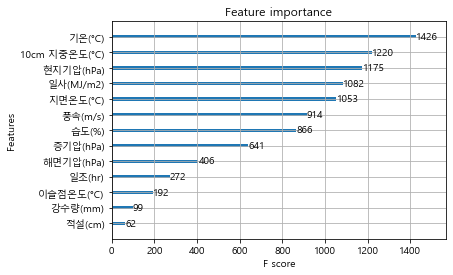

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
xgboost.plot_importance(xgb_model)

In [8]:
predictions = xgb_model.predict(X_test)
predictions

array([0.39023066, 0.38501737, 0.05604157, ..., 0.00578797, 0.4780667 ,
       0.02165878], dtype=float32)

In [9]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.6461499025466284
0.0038939395033017465


In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
rf = RandomForestRegressor()
neg_mse_scores = cross_val_score(rf, X, Y, scoring="neg_mean_squared_error", cv =5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [13]:
def get_model_cv_prediction(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv =5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("### {} ###".format(model.__class__.__name__))
    print("negative mse scores : ", np.round(neg_mse_scores, 2))
    print("rmse scores : ",np.round(rmse_scores, 2))
    print("avg socres : ", np.round(avg_rmse))
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lgb = LGBMRegressor()
models = [dt, rf, gb, lgb]
for model in models:
    get_model_cv_prediction(model, X, Y)

### DecisionTreeRegressor ###
negative mse scores :  [-0.15 -0.1  -0.08 -0.07 -0.07]
rmse scores :  [0.38 0.31 0.29 0.27 0.26]
avg socres :  0.0
### RandomForestRegressor ###
negative mse scores :  [-0.13 -0.05 -0.04 -0.03 -0.03]
rmse scores :  [0.35 0.22 0.21 0.18 0.18]
avg socres :  0.0
### GradientBoostingRegressor ###
negative mse scores :  [-0.13 -0.03 -0.04 -0.03 -0.03]
rmse scores :  [0.35 0.19 0.2  0.16 0.17]
avg socres :  0.0
### LGBMRegressor ###
negative mse scores :  [-0.13 -0.04 -0.04 -0.03 -0.03]
rmse scores :  [0.36 0.19 0.2  0.16 0.17]
avg socres :  0.0


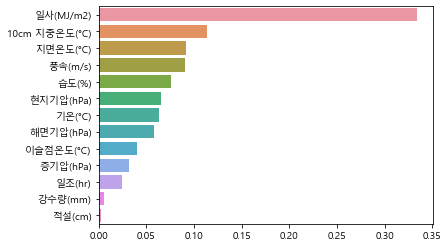

In [14]:
rf.fit(X, Y)
feature_series = pd.Series(data=rf.feature_importances_,index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y=feature_series.index)

In [15]:
df.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '지면온도(°C)',
       '10cm 지중온도(°C)', 'ulsan', 'dangjin_floating', 'dangjin_warehouse',
       'dangjin', '일시'],
      dtype='object')

In [16]:
df.corr()

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),지면온도(°C),10cm 지중온도(°C),ulsan,dangjin_floating,dangjin_warehouse,dangjin
기온(°C),1.000000,0.065425,0.148594,0.024942,0.867589,0.899719,-0.781189,-0.787174,0.228765,0.360040,-0.158966,0.956608,0.937797,0.093529,0.152119,0.174769,0.157368
강수량(mm),0.065425,1.000000,0.104193,0.138664,0.118792,0.113594,-0.147952,-0.147336,-0.083419,-0.071891,0.000804,0.042576,0.071654,-0.024129,-0.026250,-0.029784,-0.029995
풍속(m/s),0.148594,0.104193,1.000000,-0.416274,-0.008827,-0.042082,-0.163830,-0.163413,0.378719,0.427395,0.038555,0.195573,0.016445,0.100077,0.126970,0.131919,0.132300
습도(%),0.024942,0.138664,-0.416274,1.000000,0.412465,0.450505,-0.262467,-0.260011,-0.636103,-0.614369,0.009439,-0.077993,0.207639,-0.191799,-0.245880,-0.267738,-0.268831
증기압(hPa),0.867589,0.118792,-0.008827,0.412465,1.000000,0.957917,-0.778382,-0.781704,-0.070629,0.042256,-0.102411,0.794614,0.908689,-0.001845,0.014189,0.025530,0.011958
이슬점온도(°C),0.899719,0.113594,-0.042082,0.450505,0.957917,1.000000,-0.806330,-0.810579,-0.074233,0.045922,-0.136258,0.812950,0.926354,-0.004058,0.023775,0.035321,0.018466
현지기압(hPa),-0.781189,-0.147952,-0.163830,-0.262467,-0.778382,-0.806330,1.000000,0.999703,0.039612,-0.092621,0.080392,-0.721988,-0.782162,0.015472,-0.010903,-0.019952,-0.000741
해면기압(hPa),-0.787174,-0.147336,-0.163413,-0.260011,-0.781704,-0.810579,0.999703,1.000000,0.036816,-0.095809,0.084770,-0.727166,-0.786663,0.014510,-0.011478,-0.022243,-0.002454
일조(hr),0.228765,-0.083419,0.378719,-0.636103,-0.070629,-0.074233,0.039612,0.036816,1.000000,0.834816,-0.024839,0.355107,0.041158,0.341994,0.388778,0.412593,0.415725
일사(MJ/m2),0.360040,-0.071891,0.427395,-0.614369,0.042256,0.045922,-0.092621,-0.095809,0.834816,1.000000,-0.042976,0.530413,0.149960,0.413875,0.486409,0.510151,0.509738


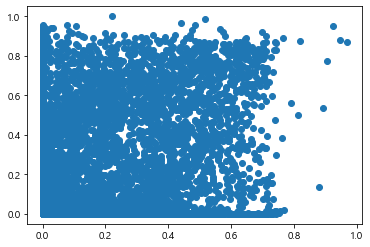

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df_sample = df[["일사(MJ/m2)","dangjin_floating"]]
df_sample = df_sample.sample(n=10000)
plt.scatter(df_sample['일사(MJ/m2)'],df_sample.dangjin_floating)

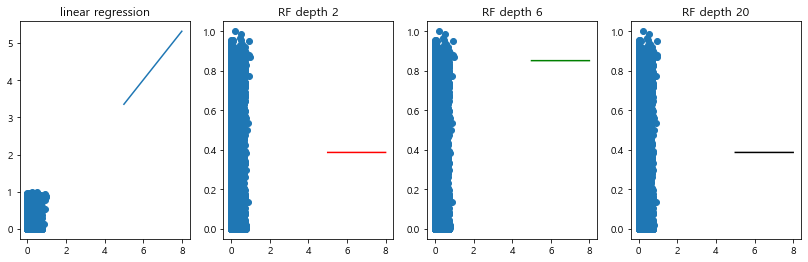

In [18]:
lr = LinearRegression()
rf_dep2 = DecisionTreeRegressor(max_depth=2)
rf_dep6 = DecisionTreeRegressor(max_depth=6)
rf_dep20 = DecisionTreeRegressor(max_depth=2)
X_train = df["일사(MJ/m2)"].values.reshape(-1, 1)
y_train = df["dangjin_floating"].values.reshape(-1, 1)
lr.fit(X_train, y_train)
rf_dep2.fit(X_train, y_train)
rf_dep6.fit(X_train, y_train)
rf_dep20.fit(X_train, y_train)
X_test = np.linspace(5, 8, 10000).reshape(-1, 1)

pred_lr = lr.predict(X_test)
pred_rf_dep2 = rf_dep2.predict(X_test)
pred_rf_dep6 = rf_dep6.predict(X_test)
pred_rf_dep20 = rf_dep20.predict(X_test)

fig, (ax1, ax2, ax3,ax4) = plt.subplots(figsize=(14, 4), ncols=4)
ax1.set_title("linear regression")
ax1.scatter(df_sample['일사(MJ/m2)'],df_sample.dangjin_floating)
ax1.plot(X_test, pred_lr)

ax2.set_title("RF depth 2")
ax2.scatter(df_sample['일사(MJ/m2)'],df_sample.dangjin_floating)
ax2.plot(X_test, pred_rf_dep2, color="red")

ax3.set_title("RF depth 6")
ax3.scatter(df_sample['일사(MJ/m2)'],df_sample.dangjin_floating)
ax3.plot(X_test, pred_rf_dep6, color="green")

ax4.set_title("RF depth 20")
ax4.scatter(df_sample['일사(MJ/m2)'],df_sample.dangjin_floating)
ax4.plot(X_test, pred_rf_dep20, color="black")

In [19]:
df2.dtypes

기온(°C)              float64
강수량(mm)             float64
풍속(m/s)             float64
습도(%)               float64
증기압(hPa)            float64
이슬점온도(°C)           float64
현지기압(hPa)           float64
해면기압(hPa)           float64
일조(hr)              float64
일사(MJ/m2)           float64
적설(cm)              float64
지면온도(°C)            float64
10cm 지중온도(°C)       float64
dangjin_floating    float64
일시                   object
dtype: object

In [20]:
df2['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [21]:
df2.dtypes

기온(°C)                     float64
강수량(mm)                    float64
풍속(m/s)                    float64
습도(%)                      float64
증기압(hPa)                   float64
이슬점온도(°C)                  float64
현지기압(hPa)                  float64
해면기압(hPa)                  float64
일조(hr)                     float64
일사(MJ/m2)                  float64
적설(cm)                     float64
지면온도(°C)                   float64
10cm 지중온도(°C)              float64
dangjin_floating           float64
일시                  datetime64[ns]
dtype: object

In [10]:
from pycaret.regression import *
from pycaret.classification import *

In [23]:
    
#clf = setup(data = df2, target = 'dangjin_floating')
#clf

,Description,Value
0,session_id,4684
1,Target,dangjin_floating
2,Original Data,"(26281, 15)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(18396, 57)"


(False,
 4684,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='dangjin_floating',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='dangjin_floatin

In [24]:
#best_3 = compare_models(sort='MSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0919,0.0212,0.1455,0.6778,0.1084,42323.0798,13.1990
xgboost,Extreme Gradient Boosting,0.0923,0.0225,0.1500,0.6575,0.1118,40800.6660,2.5870
rf,Random Forest Regressor,0.0866,0.0229,0.1512,0.6521,0.1128,30370.5706,7.0190
lightgbm,Light Gradient Boosting Machine,0.0945,0.0237,0.1538,0.6405,0.1140,39392.3999,0.1970
et,Extra Trees Regressor,0.0908,0.0256,0.1599,0.6108,0.1196,32027.0097,5.0570
gbr,Gradient Boosting Regressor,0.1137,0.0310,0.1760,0.5287,0.1306,54210.3175,2.1200
ridge,Ridge Regression,0.1208,0.0329,0.1814,0.4996,0.1363,64126.9000,0.0450
br,Bayesian Ridge,0.1208,0.0329,0.1814,0.4996,0.1363,64131.8020,0.1430
lr,Linear Regression,0.1214,0.0330,0.1817,0.4979,0.1366,64920.0148,1.2470
huber,Huber Regressor,0.1061,0.0362,0.1903,0.4492,0.1426,37781.3756,1.1940


In [25]:
#blended = blend_models(estimator_list = best_3, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0892,0.0216,0.1469,0.6817,0.1079,37361.9768
1,0.0874,0.0210,0.1448,0.6734,0.1079,33870.7499
2,0.0874,0.0210,0.1448,0.6806,0.1077,36272.0079
3,0.0907,0.0220,0.1484,0.6738,0.1102,38131.3731
4,0.0880,0.0208,0.1441,0.6756,0.1076,36725.4211
Mean,0.0885,0.0213,0.1458,0.6770,0.1083,36472.3058
SD,0.0013,0.0005,0.0016,0.0035,0.0010,1443.3502


In [26]:

#pred_holdout = predict_model(blended)
#final_model = finalize_model(blended)
#predictions = predict_model(final_model, data = test_df)
#predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0863,0.0205,0.1434,0.6850,0.1066,34967.4398


,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),Label
0,2018-01-01 00:00:00,-2.1,0.0,1.1,70.0,70.0,3.7,-6.8,1023.6,1027.3,...,0.0,0.0,NaN,NaN,-1.4,1.1,1.9,2.3,NaN,-0.083330
1,2018-01-01 01:00:00,-3.5,0.0,1.0,90.0,79.0,3.7,-6.6,1023.5,1027.2,...,0.0,0.0,NaN,NaN,-1.6,1.0,1.8,2.2,3.0,-0.011657
2,2018-01-01 02:00:00,-4.3,0.0,0.4,0.0,86.0,3.8,-6.3,1023.5,1027.3,...,0.0,0.0,NaN,NaN,-1.8,0.8,1.7,2.2,3.0,0.045619
3,2018-01-01 03:00:00,-5.1,0.0,0.2,0.0,89.0,3.7,-6.6,1023.8,1027.6,...,0.0,0.0,NaN,NaN,-2.1,0.7,1.6,2.1,3.0,0.112747
4,2018-01-01 04:00:00,-5.6,0.0,0.6,20.0,90.0,3.6,-7.0,1023.8,1027.6,...,0.0,0.0,NaN,NaN,-2.2,0.6,1.6,2.0,2.9,0.127318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,2020-12-31 19:00:00,-6.4,0.0,0.8,70.0,85.0,3.2,-8.5,1023.1,1026.4,...,0.0,2.2,8.0,668.0,-0.3,0.6,1.3,1.8,2.8,0.043228
26277,2020-12-31 20:00:00,-6.7,0.0,1.1,230.0,88.0,3.3,-8.3,1023.9,1027.2,...,0.0,2.1,9.0,1395.0,-0.5,0.6,1.3,1.8,2.7,0.039813
26278,2020-12-31 21:00:00,-6.9,0.0,0.5,230.0,88.0,3.2,-8.5,1023.8,1027.1,...,0.0,1.9,9.0,1036.0,-0.7,0.7,1.3,1.8,2.7,0.047751
26279,2020-12-31 22:00:00,-6.9,0.0,0.5,180.0,89.0,3.2,-8.4,1023.9,1027.2,...,0.0,1.8,10.0,890.0,-0.8,0.7,1.3,1.8,2.7,0.018881


In [ ]:
#model_catboost = create_model('catboost', fold = 5)
#model_catboost = tune_model(model_catboost, fold=5, optimize = 'RMSE', choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0944,0.0222,0.1491,0.6720,0.1100,44219.0507
1,0.0906,0.0210,0.1448,0.6733,0.1080,39585.6982
2,0.0915,0.0214,0.1462,0.6748,0.1088,42964.0107
3,0.0948,0.0224,0.1498,0.6674,0.1114,43357.0794
4,0.0922,0.0210,0.1451,0.6714,0.1084,43164.1750
Mean,0.0927,0.0216,0.1470,0.6718,0.1093,42658.0028
SD,0.0016,0.0006,0.0021,0.0025,0.0012,1594.6464


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:42:49
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
clf = setup(data = df2, target = '')
clf

In [9]:
df

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),지면온도(°C),10cm 지중온도(°C),ulsan,dangjin_floating,dangjin_warehouse,dangjin,일시
0,0.257634,0.0,0.094017,0.586579,0.076487,0.312500,0.758095,0.766478,0.0,0.0,0.000000,0.114493,0.123393,0.0,5.075459e-07,0.000005,0.0,2018-01-01 00:00
1,0.230916,0.0,0.085470,0.674566,0.076487,0.316532,0.756190,0.764595,0.0,0.0,0.000000,0.111594,0.120823,0.0,5.075459e-07,0.000005,0.0,2018-01-01 01:00
2,0.215649,0.0,0.034188,0.743000,0.079320,0.322581,0.756190,0.766478,0.0,0.0,0.000000,0.108696,0.118252,0.0,5.075459e-07,0.000005,0.0,2018-01-01 02:00
3,0.200382,0.0,0.017094,0.772329,0.076487,0.316532,0.761905,0.772128,0.0,0.0,0.000000,0.104348,0.115681,0.0,5.075459e-07,0.000005,0.0,2018-01-01 03:00
4,0.190840,0.0,0.051282,0.782105,0.073654,0.308468,0.761905,0.772128,0.0,0.0,0.000000,0.102899,0.115681,0.0,5.075459e-07,0.000005,0.0,2018-01-01 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,0.175573,0.0,0.068376,0.733224,0.062323,0.278226,0.748571,0.749529,0.0,0.0,0.180328,0.130435,0.107969,0.0,5.075459e-07,0.000005,0.0,2020-12-31 19:00
26277,0.169847,0.0,0.094017,0.762552,0.065156,0.282258,0.763810,0.764595,0.0,0.0,0.172131,0.127536,0.107969,0.0,5.075459e-07,0.000005,0.0,2020-12-31 20:00
26278,0.166031,0.0,0.042735,0.762552,0.062323,0.278226,0.761905,0.762712,0.0,0.0,0.155738,0.124638,0.107969,0.0,5.075459e-07,0.000005,0.0,2020-12-31 21:00
26279,0.166031,0.0,0.042735,0.772329,0.062323,0.280242,0.763810,0.764595,0.0,0.0,0.147541,0.123188,0.107969,0.0,5.075459e-07,0.000005,0.0,2020-12-31 22:00


In [4]:
df = pd.read_csv('ASOS_dangjin_from_2018.csv',encoding='cp949')

In [5]:
df

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,129,2018-01-01 00:00,-2.1,NaN,1.1,70.0,70.0,3.7,-6.8,1023.6,...,NaN,NaN,NaN,NaN,NaN,-1.4,1.1,1.9,2.3,NaN
1,129,2018-01-01 01:00,-3.5,NaN,1.0,90.0,79.0,3.7,-6.6,1023.5,...,NaN,NaN,NaN,NaN,NaN,-1.6,1.0,1.8,2.2,3.0
2,129,2018-01-01 02:00,-4.3,NaN,0.4,0.0,86.0,3.8,-6.3,1023.5,...,NaN,NaN,NaN,NaN,NaN,-1.8,0.8,1.7,2.2,3.0
3,129,2018-01-01 03:00,-5.1,NaN,0.2,0.0,89.0,3.7,-6.6,1023.8,...,NaN,NaN,NaN,NaN,NaN,-2.1,0.7,1.6,2.1,3.0
4,129,2018-01-01 04:00,-5.6,NaN,0.6,20.0,90.0,3.6,-7.0,1023.8,...,NaN,NaN,NaN,NaN,NaN,-2.2,0.6,1.6,2.0,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,129,2020-12-31 19:00,-6.4,NaN,0.8,70.0,85.0,3.2,-8.5,1023.1,...,NaN,NaN,668.0,NaN,NaN,-0.3,0.6,1.3,1.8,2.8
26277,129,2020-12-31 20:00,-6.7,NaN,1.1,230.0,88.0,3.3,-8.3,1023.9,...,NaN,NaN,1395.0,NaN,NaN,-0.5,0.6,1.3,1.8,2.7
26278,129,2020-12-31 21:00,-6.9,0.0,0.5,230.0,88.0,3.2,-8.5,1023.8,...,NaN,NaN,1036.0,NaN,NaN,-0.7,0.7,1.3,1.8,2.7
26279,129,2020-12-31 22:00,-6.9,NaN,0.5,180.0,89.0,3.2,-8.4,1023.9,...,NaN,NaN,890.0,NaN,NaN,-0.8,0.7,1.3,1.8,2.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             26281 non-null  int64  
 1   일시             26281 non-null  object 
 2   기온(°C)         26235 non-null  float64
 3   강수량(mm)        2488 non-null   float64
 4   풍속(m/s)        26244 non-null  float64
 5   풍향(16방위)       26244 non-null  float64
 6   습도(%)          26241 non-null  float64
 7   증기압(hPa)       26236 non-null  float64
 8   이슬점온도(°C)      26234 non-null  float64
 9   현지기압(hPa)      26242 non-null  float64
 10  해면기압(hPa)      26240 non-null  float64
 11  일조(hr)         14305 non-null  float64
 12  일사(MJ/m2)      14305 non-null  float64
 13  적설(cm)         355 non-null    float64
 14  3시간신적설(cm)     0 non-null      float64
 15  전운량(10분위)      20913 non-null  float64
 16  중하층운량(10분위)    0 non-null      float64
 17  운형(운형약어)       0 non-null      float64
 18  최저운고(1

In [7]:
df['풍향(16방위)'] = df['풍향(16방위)'].apply(lambda x: 7.0 if x==360 else (x//45))
df['풍향(16방위)']

0        1.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
26276    1.0
26277    5.0
26278    5.0
26279    4.0
26280    0.0
Name: 풍향(16방위), Length: 26281, dtype: float64

In [8]:
df['풍향(16방위)'].value_counts()

0.0    7274
7.0    6483
1.0    3884
4.0    2844
5.0    2233
6.0    1868
2.0     888
3.0     770
Name: 풍향(16방위), dtype: int64

In [11]:
clf = setup(data = df, 
            target = '풍향(16방위)',
            ignore_low_variance=True,
#            normalize=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.9,
            session_id = 20210302,
            combine_rare_levels = True, rare_level_threshold = 0.1)
clf

,Description,Value
0,session_id,20210302
1,Target,풍향(16방위)
2,Target Type,Multiclass
3,Label Encoded,"0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7"
4,Original Data,"(26281, 27)"
5,Missing Values,True
6,Numeric Features,17
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


(None,
 20296    7
 23785    3
 15500    0
 3065     1
 8787     0
         ..
 9660     7
 24940    3
 18017    1
 16706    7
 20668    4
 Name: 풍향(16방위), Length: 18364, dtype: int32,
        풍속(m/s)  습도(%)  이슬점온도(°C)    현지기압(hPa)    일조(hr)  일사(MJ/m2)  \
 0          1.1   70.0       -6.8  1023.599976  0.530767   1.133762   
 1          1.0   79.0       -6.6  1023.500000  0.530767   1.133762   
 2          0.4   86.0       -6.3  1023.500000  0.530767   1.133762   
 3          0.2   89.0       -6.6  1023.799988  0.530767   1.133762   
 4          0.6   90.0       -7.0  1023.799988  0.530767   1.133762   
 ...        ...    ...        ...          ...       ...        ...   
 26276      0.8   85.0       -8.5  1023.099976  0.530767   1.133762   
 26277      1.1   88.0       -8.3  1023.900024  0.530767   1.133762   
 26278      0.5   88.0       -8.5  1023.799988  0.530767   1.133762   
 26279      0.5   89.0       -8.4  1023.900024  0.530767   1.133762   
 26280      0.1   90.0       -7.3 

In [12]:
best_3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5914,0.8794,0.4175,0.5828,0.5706,0.4874,0.4923,2.9120
catboost,CatBoost Classifier,0.5809,0.8810,0.4163,0.5766,0.5662,0.4782,0.4820,33.5480
lightgbm,Light Gradient Boosting Machine,0.5648,0.8714,0.3981,0.5633,0.5505,0.4584,0.4626,1.2520
et,Extra Trees Classifier,0.5639,0.8574,0.3890,0.5371,0.5357,0.4470,0.4515,2.1290
xgboost,Extreme Gradient Boosting,0.5600,0.8698,0.3940,0.5508,0.5449,0.4521,0.4554,21.7440
gbc,Gradient Boosting Classifier,0.5311,0.8492,0.3561,0.5478,0.5150,0.4150,0.4228,20.7960
dt,Decision Tree Classifier,0.5000,0.7014,0.3698,0.5003,0.4999,0.3866,0.3867,0.1560
ada,Ada Boost Classifier,0.4876,0.7976,0.3070,0.4845,0.4646,0.3560,0.3648,0.7130
lda,Linear Discriminant Analysis,0.4757,0.7889,0.2937,0.4160,0.4303,0.3293,0.3357,0.2730
ridge,Ridge Classifier,0.4656,0.0000,0.2587,0.3870,0.3839,0.2961,0.3160,0.0550


In [ ]:
blended = blend_models(estimator_list = best_3, fold = 5)


In [ ]:
pred_holdout = predict_model(blended)
final_model = finalize_model(blended)
predictions = predict_model(final_model, data = test_df)
predictions